In [4]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt

In [75]:
def softmax(Z):
    # Z.shape = (N, C)
    e_Z = np.exp(Z)
    return e_Z/np.sum(e_Z, axis=1, keepdims = True)

def softmax_stable(Z):
    e_Z = np.exp(Z - np.amax(Z, axis=1))
    return e_Z/np.sum(e_Z, axis=1, keepdims = True)

def convert_labels(y, C):
    """"
    Chuyển ma trận nhãn từ dạng số sang dạng one-hot
    VD: y = [0, 2, 1, 0]
    -> y = [[1, 0, 0],
            [0, 0, 1],
            [0, 1, 0],
            [1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), (np.arange(len(y)), y)), shape=(len(y), C)).toarray()
    return Y

In [76]:
# Kiểm tra đạo hàm
def cost(X, Y, W):
    # X.shape = (N, d); Y.shape = (N, C), W.shape = (d, C)
    A = softmax(X.dot(W))
    return -np.sum(Y*np.log(A))

def grad(X, Y, W):
    A = softmax(X.dot(W))
    E = A - Y
    return X.T.dot(E)

def numerical_grad(X, Y, W):
    eps = 1e-6
    g = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W_p = W.copy()
            W_n = W.copy()
            W_p[i, j] += eps
            W_n[i, j] -= eps
            g[i, j] = (cost(X, Y, W_p) - cost(X, Y, W_n))/(2*eps)
    return g

N = 2
d = 2
C = 3

X = np.random.randn(N, d)
y = np.random.randint(0, 3, (N,))
Y = convert_labels(y, C)
W_init = np.random.randn(d, C) 

g1 = grad(X, Y, W_init)
g2 = numerical_grad(X, Y, W_init)
print(np.linalg.norm(g1 - g2))

5.326032757113253e-10


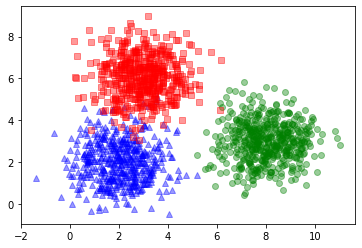

[[ 2.85799599 -0.62945798 -0.59259692]
 [ 0.09669281  1.58014985 -0.51320571]
 [ 0.25816663 -0.07036353  1.69064018]]


In [100]:
def softmax_regression(X, y, W_init, eta):
    W = [W_init]
    C = W_init.shape[1]
    d = X.shape[1]
    N = X.shape[0]
    Y = convert_labels(y, C)
    
    count = 0
    while count < 10000:
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[i, :].reshape(1, d)
            yi = Y[i, :].reshape(1, C)
            ai = softmax(xi.dot(W[-1]))
            W_new = W[-1] - eta*xi.T.dot(ai - yi)
            count +=1
            if np.linalg.norm(W_new - W[-1]) < 1e-4:
                return W
            W.append(W_new)
    return W

def pred(W, X):
    A = softmax_stable(X.dot(W))
    return np.argmax(A, axis=1)

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis=0)
Xbar = np.concatenate((np.ones((3*N, 1)), X), axis=1)
C = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N)
eta = 0.05

plt.plot(X0[:, 0], X0[:, 1], 'b^', alpha=0.4)
plt.plot(X1[:, 0], X1[:, 1], 'go', alpha=0.4)
plt.plot(X2[:, 0], X2[:, 1], 'rs', alpha=0.4)

x_plot = np.array([0, 10])
y_plot1 = -W[-1][1][0]/W[-1][2][0]*x_plot - W[-1][0][0]/W[-1][2][0]
y_plot2 = -W[-1][1][1]/W[-1][2][1]*x_plot - W[-1][0][1]/W[-1][2][1]
y_plot3 = -W[-1][1][2]/W[-1][2][2]*x_plot - W[-1][0][2]/W[-1][2][2]
plt.show()

W_init = np.random.rand(Xbar.shape[1], C)
W = softmax_regression(Xbar, original_label, W_init, eta)
print(W[-1])